### This File Contains 
1. Data Set Overview
2. Column-Wise Analysis
3. Data Cleaning
4. Top 5 Critical Columns Which Most Insightful for Stakeholders
5. Visualizations
6. Feature/Tag Generation from Free Text Fields
7. Summary and Insights
8. Actionable Recommendations for Stakeholders

#### Imp Librearies for Data Analysis And Visualiation

In [16]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [17]:
data = pd.read_excel("DA -Task 2.xlsx") # Loading the excel file data 

In [18]:
df = data.copy()

In [19]:
df 

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [20]:
df.duplicated().sum()

0

## Data Set Overview
1) This dataset contains detailed service and repair records for vehicles, likely collected from dealerships or authorized service centers. 
2) Each row represents a single repair transaction for a specific vehicle, identified by its VIN (Vehicle Identification Number).

In [21]:
df.shape # --> There are total 100 rows and 52 columns 

(100, 52)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

# 1. Column-Wise Analysis: 
 

### Checking Data Types 

In [23]:
df.dtypes #--> Checking the datatypes 

VIN                                      object
TRANSACTION_ID                            int64
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                             int64
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE                              

In [24]:
# Count numerical columns (int64 and float64 types)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).shape[1]
print(f"Numerical columns: {numerical_columns}")

# Count categorical columns (object and category types)
categorical_columns = df.select_dtypes(include=['object', 'category']).shape[1]
print(f"Categorical columns: {categorical_columns}")

# Count Date-Time columns (datetime64[ns] types)
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).shape[1]
print(f"datetime columns: {datetime_columns}")


Numerical columns: 18
Categorical columns: 33
datetime columns: 1


## Obs. 
1) There are total 18 columns which are Numerical and 33 are the Categorical Columns 


### Checking Unique Values 

In [25]:
print("Distinct values present in the Numerical column\n")
for col in df.select_dtypes(include=['int64', 'float64']):
    print(f" Unique values in {col}:-->   {df[col].nunique()}")
    
print("\nUnique values present in the categorical_columns \n")
for col in df.select_dtypes(include=['object', 'category']):
    print(f" Unique values in {col}:-->   {df[col].nunique()}")



Distinct values present in the Numerical column

 Unique values in TRANSACTION_ID:-->   32
 Unique values in DEALER_REGION:-->   2
 Unique values in REPAIR_AGE:-->   35
 Unique values in KM:-->   100
 Unique values in COMPLAINT_CD_CSI:-->   1
 Unique values in ORD_SELLING_SRC_CD:-->   7
 Unique values in GLOBAL_LABOR_CODE:-->   4
 Unique values in CAMPAIGN_NBR:-->   0
 Unique values in REPORTING_COST:-->   100
 Unique values in TOTALCOST:-->   94
 Unique values in LBRCOST:-->   99
 Unique values in TRANSMISSION_SOURCE_PLANT:-->   6
 Unique values in SRC_TXN_ID:-->   100
 Unique values in SRC_VER_NBR:-->   10
 Unique values in TRANSACTION_CNTR:-->   1
 Unique values in LAST_KNOWN_DELVRY_TYPE_CD:-->   11
 Unique values in NON_CAUSAL_PART_QTY:-->   2
 Unique values in SALES_REGION_CODE:-->   2

Unique values present in the categorical_columns 

 Unique values in VIN:-->   98
 Unique values in CORRECTION_VERBATIM:-->   93
 Unique values in CUSTOMER_VERBATIM:-->   100
 Unique values in CAUS

## Observations on Numerical Columns
1) High Cardinality (Many Unique Values):

KM, REPORTING_COST, SRC_TXN_ID, LBRCOST, TOTALCOST – close to or exactly 100 unique values.

These are likely continuous variables or identifiers with minimal repetition.

2) Low or Zero Variance:

CAMPAIGN_NBR and TRANSACTION_CNTR have 0 or 1 unique value, meaning they add no useful variance and can be dropped from modeling or analysis.

3) Potential Identifiers:

TRANSACTION_ID and SRC_TXN_ID may just serve as row identifiers rather than useful features.

4) Discrete Numeric Fields:

ORD_SELLING_SRC_CD, GLOBAL_LABOR_CODE, DEALER_REGION, etc. show fewer than 10 unique values – may be better treated as categorical, despite being numeric.

## Observations on Categorical Columns
1) High Cardinality:

VIN, CUSTOMER_VERBATIM, CORRECTION_VERBATIM, DEALER_NAME, etc. have close to 100 unique values — likely free-text or unique identifiers.

2) Free-text / NLP Candidates:

CUSTOMER_VERBATIM, CORRECTION_VERBATIM – perfect for text tagging or keyword extraction.

These need cleaning (remove special characters, lowercasing, etc.) and categorization.

3) Categorical Columns with Consistent Labels:

Columns like STATE, BODY_STYLE, PLATFORM, ENGINE, etc. have reasonable unique values and are likely useful for grouping or filtering.

4) Column Redundancy Check:

ENGINE and ENGINE_DESC, TRANSMISSION and TRANSMISSION_DESC – might be redundant. If highly correlated, you might drop one.

5) Potential for Grouping:

PLATFORM, PLANT, VEH_TEST_GRP, etc. could be useful for segment-level analysis, like comparing failure rates by platform or manufacturing plant.

### Descriptive stats for numerical columns 

In [30]:
df[['CAMPAIGN_NBR','TRANSACTION_CNTR']]

array([1], dtype=int64)

In [26]:
df.select_dtypes(include=['int64', 'float64']).describe()


,TRANSACTION_ID,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
std,12.028166,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434
min,13021.000000,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000


#### Distribution  of the datasets

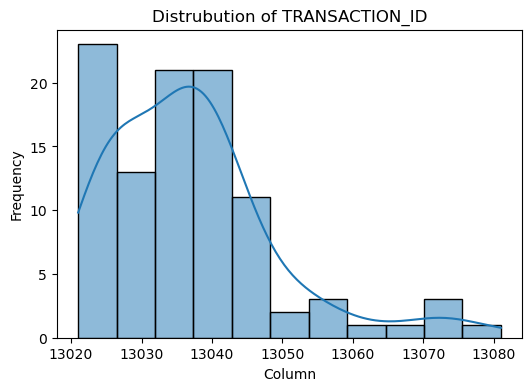

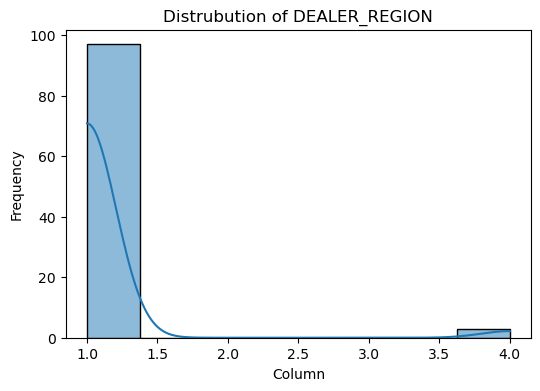

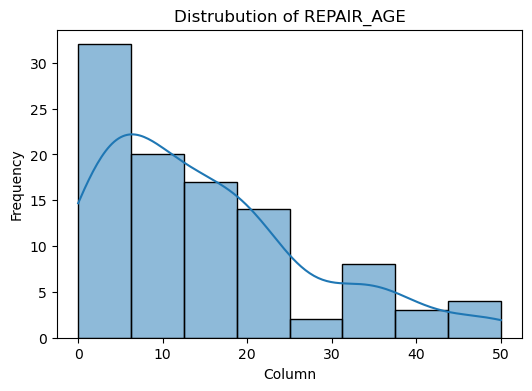

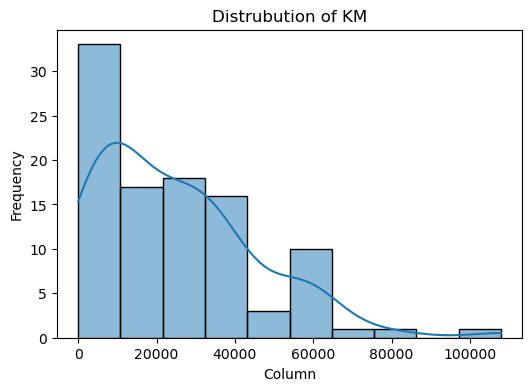

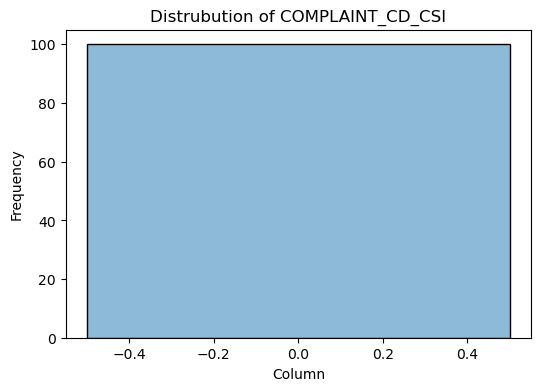

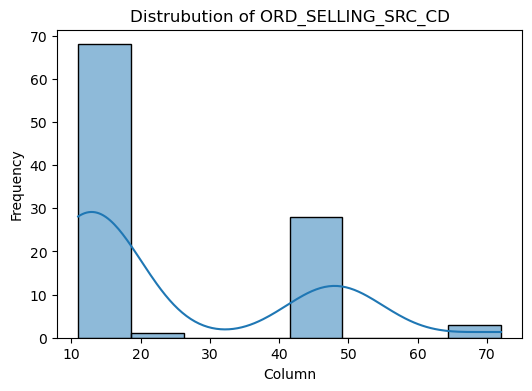

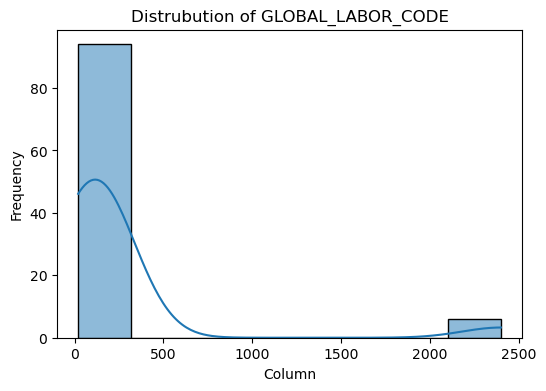

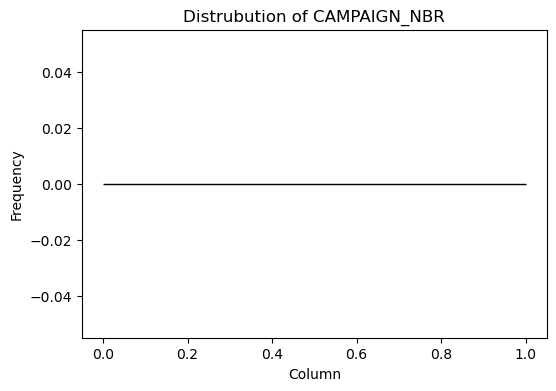

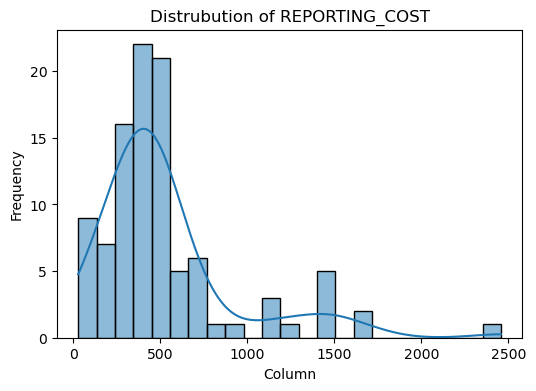

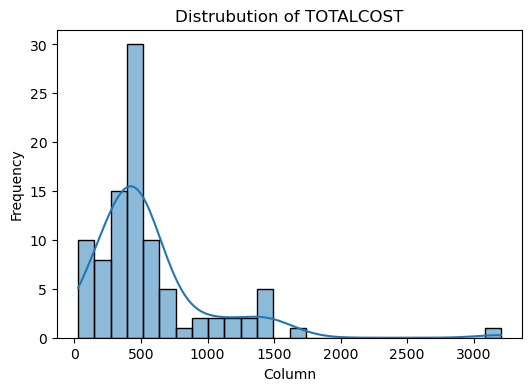

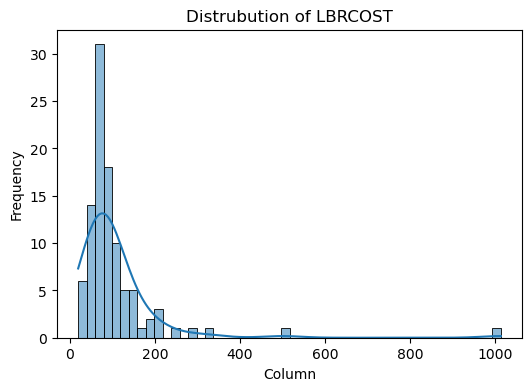

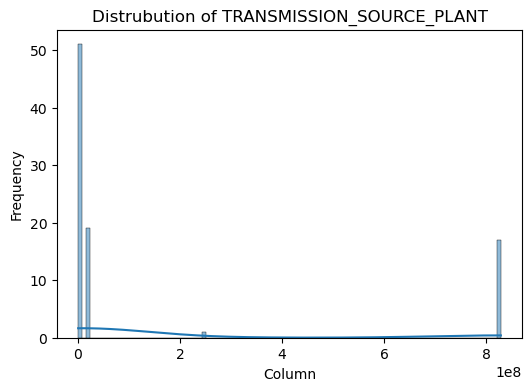

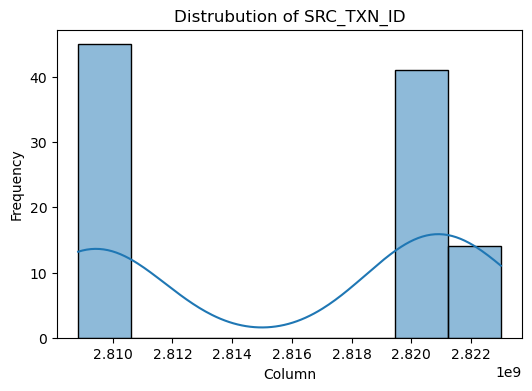

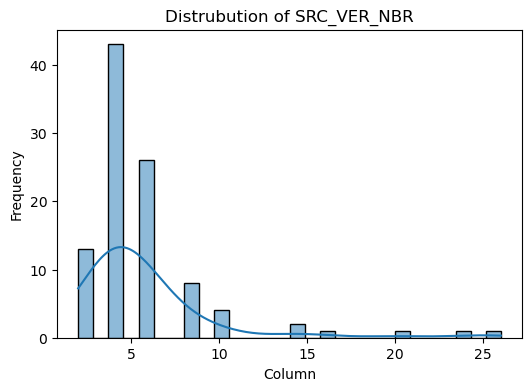

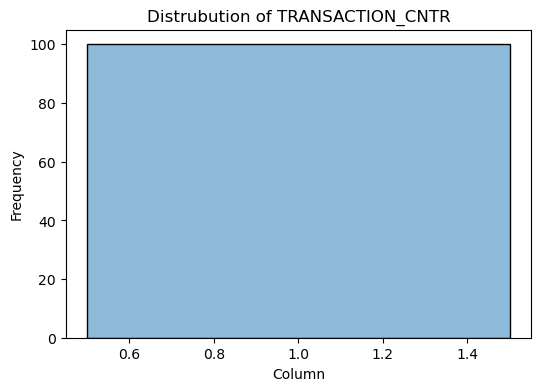

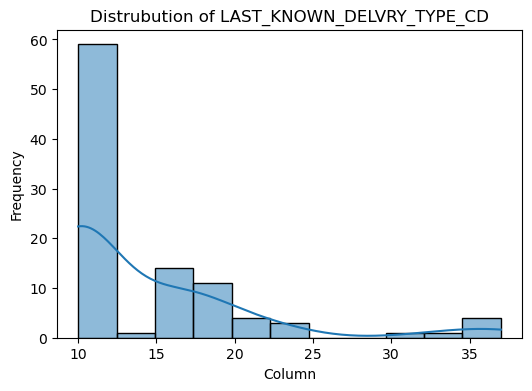

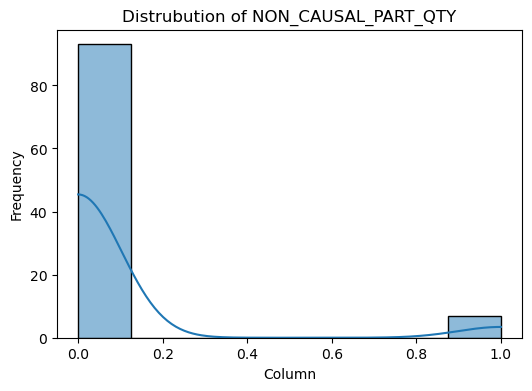

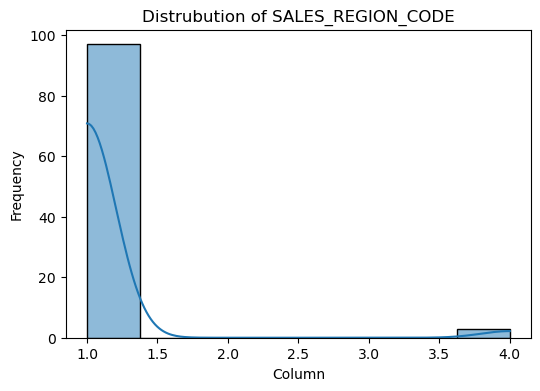

In [31]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_col:
    plt.figure(figsize = (6,4))
    sns.histplot(df[column], kde = True)
    plt.title(f'Distrubution of {column}')
    plt.xlabel("Column")
    plt.ylabel('Frequency')
    plt.show()

### Observation
1) REPAIR_AGE: Right-skewed. Majority of repairs happen within the first 2–3 years of vehicle life.

2) KM: Broad range but has peaks around 20K–50K KM, again showing early usage failures.

3) REPAIR_COST: Highly skewed, with a small number of expensive repairs contributing to high variance.

### Significance for Stakeholders: 
Help in assessing lifecycle trends, identifying costly repairs, and optimizing 
warranty coverage. 

# 2. Data Cleaning

### Checking Null Values And Saperating the Numerical and the Categorical Columns 

In [32]:
numerical_col = df.select_dtypes(include = ['int64', 'float64'])
Categorical_col = df.select_dtypes(include = ['object', 'category'])

Null_Values_columns = df.isnull().sum()[df.isnull().sum() >0]
print(f'{Null_Values_columns}\n')
print(f'There are {Null_Values_columns.count()} null values columns')

CAUSAL_PART_NM                  5
PLANT                           1
STATE                           2
REPAIR_DLR_POSTAL_CD            2
VEH_TEST_GRP                    2
OPTN_FAMLY_CERTIFICATION       10
OPTF_FAMLY_EMISSIOF_SYSTEM      5
CAMPAIGN_NBR                  100
TOTALCOST                       6
ENGINE_SOURCE_PLANT            12
ENGINE_TRACE_NBR               12
TRANSMISSION_SOURCE_PLANT      12
TRANSMISSION_TRACE_NBR         12
LINE_SERIES                     1
LAST_KNOWN_DELVRY_TYPE_CD       2
dtype: int64

There are 15 null values columns


In [65]:
# Basic metadata summary: data types, unique counts, and null counts
column_summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique(),
    "Missing Values": df.isnull().sum(),
    "Missing (%)": df.isnull().mean() * 100
})

column_summary = column_summary.sort_values(by="Missing Values", ascending=False)
column_summary.head(15)  # Displaying top 15 columns with most missing values for now


,Data Type,Unique Values,Missing Values,Missing (%)
CAMPAIGN_NBR,float64,0,100,100.0
ENGINE_TRACE_NBR,object,88,12,12.0
TRANSMISSION_TRACE_NBR,object,88,12,12.0
ENGINE_SOURCE_PLANT,object,9,12,12.0
TRANSMISSION_SOURCE_PLANT,float64,6,12,12.0
OPTN_FAMLY_CERTIFICATION,object,3,10,10.0
TOTALCOST,float64,94,6,6.0
OPTF_FAMLY_EMISSIOF_SYSTEM,object,8,5,5.0
CAUSAL_PART_NM,object,18,5,5.0
LAST_KNOWN_DELVRY_TYPE_CD,float64,11,2,2.0


### Obs.
There are 100 % values are null in the CAMPAIGN_NBR so it will be fine if we drop it

In [35]:
df1 = df.copy() # now we are performing some manupulations on data so I make a copy of our date 

In [36]:
df1.columns = df1.columns.str.strip() #--> To remove the unnecessary spaces of the column name 

We are dropping the CAMPAIGN_NBR column here cause these column is 100 % empty

In [37]:
df1.drop(columns='CAMPAIGN_NBR', inplace = True)

In [38]:
# checking the column we droppe is present or not
def check_column_exists(df1, column_name):
    if column_name in df1.columns:
        print(f"✅ Column '{column_name}' is present in the DataFrame.")
        return True
    else:
        print(f"❌ Column '{column_name}' is NOT present in the DataFrame.")
        return False
check_column_exists(df1, 'CAMPAIGN_NBR')

❌ Column 'CAMPAIGN_NBR' is NOT present in the DataFrame.


False

In [39]:
df1.shape

(100, 51)

In [50]:
df1.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_DELVRY_TYPE_CD', 

## Priority Columns for Analysis 

now we are splitting columns into categories

Feature Selection: selecting the columns for the further cleaning and the analysis based on the categories


In [41]:
cost_financial = df1[['TOTALCOST', 'LBRCOST', 'REPORTING_COST', 'REPAIR_AGE', 'KM', 'NON_CAUSAL_PART_QTY']]
Repair_Details = df1[['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'TRANSACTION_CATEGORY', 'REPAIR_DATE']]
Vehicle_Metadata = df1[['VIN', 'ENGINE_DESC', 'TRANSMISSION_DESC', 'BODY_STYLE', 'PLATFORM', 'BUILD_COUNTRY']]
Dealer_Location = df1[['DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'LAST_KNOWN_DLR_NAME']]
print(f"cost_financial\n {cost_financial}\n Repair_Details\n{Repair_Details}\n Vehicle_Metadata\n{Vehicle_Metadata}\n Dealer_Location\n{Dealer_Location}")


cost_financial
     TOTALCOST  LBRCOST  REPORTING_COST  REPAIR_AGE     KM  NON_CAUSAL_PART_QTY
0      370.03    61.46          370.03           6   8872                    0
1      307.32   291.14          307.32           5  16346                    0
2     3205.45  1012.67         2457.45           9   8887                    0
3      445.28    63.18          445.28          10  15500                    0
4     1439.65   136.00         1439.65           0      8                    0
..        ...      ...             ...         ...    ...                  ...
95    1026.53    59.88          718.53          32  35451                    1
96    1474.06   118.90         1474.06           8  13393                    0
97     481.95    86.57          481.95          12  25341                    0
98     101.85   101.85          101.85           4     13                    0
99     524.56    54.27          524.56          38  48660                    0

[100 rows x 6 columns]
 Repair_Deta

## keeping the only imp columns and saving it in a df_filtered file 

In [45]:
# Define the reordered columns
ordered_columns = [
    # Primary Key
    'VIN',

    # Vehicle Info
    'ENGINE_DESC', 'TRANSMISSION_DESC', 'BODY_STYLE', 'PLATFORM',

    # Repair Event & Complaint
    'REPAIR_AGE', 'KM', 'CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM',
    'CAUSAL_PART_NM', 'TRANSACTION_CATEGORY',

    # Cost & Metrics
    'TOTALCOST', 'LBRCOST', 'REPORTING_COST',

    # Dealer/Location Info
    'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION'
]

# Filter and reorder
df_cleaned = df1[ordered_columns]

#

In [46]:
# Save to CSV
df_cleaned.to_csv('vehicle_data_cleaned.csv', index=False)

print("✅ Data cleaned and saved as 'vehicle_data_cleaned.csv'")


✅ Data cleaned and saved as 'vehicle_data_cleaned.csv'


In [210]:
df_imp = pd.read_csv('vehicle_data_cleaned.csv')

In [211]:
df_imp.columns


Index(['VIN', 'ENGINE_DESC', 'TRANSMISSION_DESC', 'BODY_STYLE', 'PLATFORM',
       'REPAIR_AGE', 'KM', 'CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM',
       'CAUSAL_PART_NM', 'TRANSACTION_CATEGORY', 'TOTALCOST', 'LBRCOST',
       'REPORTING_COST', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE',
       'DEALER_REGION'],
      dtype='object')

## Why these columns are imp for stackholders 


1) VIN – Vehicle Identification Number

    Why it matters:

        Enables tracking of vehicle history, recalls, repeated repairs.
        Important for warranty validation

2)  VEHICLE INFORMATION

    ENGINE_DESC, TRANSMISSION_DESC
    
    Why it matters:

        Identifies if certain powertrain configurations are leading to more repairs.
        Helps engineering or quality teams pinpoint design/manufacturing issues.

3) BODY_STYLE

    Why it matters:

        Useful in analyzing issues by vehicle segment (SUVs vs sedans).
        Helps product planning and inventory stocking decisions.

4) PLATFORM

    Why it matters:

        Flags if issues are widespread across models sharing the same base design.
        Helps engineering teams address systemic issues.

5) REPAIR EVENT & COMPLAINT DETAILS

     REPAIR_AGE
     
    Why it matters:

        Determines when issues typically arise (early life vs late life).
        Critical for warranty strategy and extended service plans.

6) KM

    Why it matters:

           Mileage-based failure insights — supports predictive maintenance models.
           Impacts service scheduling and part reliability reports.

7) CUSTOMER_VERBATIM
    Why it matters:

        Real customer voice: reveals pain points, language patterns, and dissatisfaction.
        Valuable for CX teams, NLP sentiment analysis, and product design feedback.
8) CORRECTION_VERBATIM

    Why it matters:

        Shows what actually fixed the issue.
        Valuable for tech training, repair time forecasting, and efficiency analysis.

9) CAUSAL_PART_NM

    Why it matters:

        Helps identify part failure trends.
        Supports supply chain, parts warranty planning, and recall detection.

10) TRANSACTION_CATEGORY

    Why it matters:

        Differentiates warranty vs goodwill vs retail repairs.
        Crucial for cost recovery, policy setting, and financial reporting.


11) COST & METRICS

     TOTALCOST
     
    Why it matters:

        Direct financial impact. Central to cost control and profitability analysis.
        Key KPI for warranty budgeting and repair severity analysis.

12) LBRCOST

    Why it matters:

        Useful for analyzing technician time, labor rate optimization.
        Helps dealer service departments assess productivity.

13) REPORTING_COST

    Why it matters:

        The cost submitted to warranty/claims.
        Supports fraud detection, cost audit, and insurance negotiations.

14) DEALER & LOCATION INFO

     DEALER_NAME
    
    Why it matters:

        Dealer-specific performance insights.
        Supports dealer ranking, incentive planning, and training needs analysis.

     REPAIR_DLR_CITY, STATE
        
    Why it matters:

        Identifies geographic hotspots for issues.
        Enables localized campaigns, and climate-related issue tracking.

     DEALER_REGION
     
    Why it matters:

        Aggregated regional analysis for field operations and zonal managers.
        Useful for staffing, inventory planning, and customer experience oversight.



### Category-Based Justification for Excluded Columns:

1. Low Analytical Value / Identifiers
Examples:

TRANSACTION_ID, SRC_TXN_ID, SRC_VER_NBR, TRANSACTION_CNTR

Primarily used for tracking or auditing — not meaningful for pattern recognition or analysis.

2. Too Granular / Trace-Level Info
Examples:

ENGINE_TRACE_NBR, TRANSMISSION_TRACE_NBR, ENGINE_SOURCE_PLANT

Trace numbers or source plants are more useful in a manufacturing defect investigation than service-level pattern analysis.

3. Redundant or Covered Elsewhere
Examples:

ENGINE, TRANSMISSION (already captured in ENGINE_DESC, TRANSMISSION_DESC)

Selected the descriptive fields instead of codes for better interpretability.

4. Dealer & Geography Detail Overlap
Examples:

LAST_KNOWN_DLR_NAME, LAST_KNOWN_DLR_CITY, REPAIRING_DEALER_CODE, REPAIR_DLR_POSTAL_CD

I retained core dealer and region info (DEALER_NAME, REPAIR_DLR_CITY, STATE, DEALER_REGION), and excluded more granular or last-known fields to avoid redundancy.

5. Sales/Build/Cert Data Not Directly Relevant to Repair Outcome
Examples:

VPPC, PLANT, BUILD_COUNTRY, COUNTRY_SALE_ISO, SALES_REGION_CODE, OPTN_FAMLY_CERTIFICATION, OPTF_FAMLY_EMISSIOF_SYSTEM

Focused the scope on repair-related factors rather than manufacturing/sales data which would be more relevant in a broader product quality study.

6. Non-Informative or Out of Scope
Examples:

MEDIA_FLAG, VIN_MODL_DESGTR, LINE_SERIES, LAST_KNOWN_DELVRY_TYPE_CD, NON_CAUSAL_PART_QTY, COMPLAINT_CD_CSI, COMPLAINT_CD, VEH_TEST_GRP, ORD_SELLING_SRC_CD

These were either unclear in meaning without further documentation or didn’t appear to significantly contribute to root cause or repair outcome analysis.

## Remaining Data Cleaning for the imp Columns

In [212]:
df_imp.duplicated().sum()

0

In [213]:
df_imp.isnull().sum()[df_imp.isnull().sum()>0]

CAUSAL_PART_NM    5
TOTALCOST         6
STATE             2
dtype: int64

#### CAUSAL_PART_NM  

In [214]:
df_imp['CAUSAL_PART_NM']

0         WHEEL ASM-STRG *JET BLACK
1       MODULE ASM-STRG WHL HT CONT
2     WHEEL ASM-STRG *BACKEN BLACKK
3         WHEEL ASM-STRG *JET BLACK
4         WHEEL ASM-STRG *JET BLACK
                  ...              
95            WHEEL ASM-STRG *BLACK
96    WHEEL ASM-STRG *BACKEN BLACKK
97            WHEEL ASM-STRG *BLACK
98                              NaN
99    WHEEL ASM-STRG *DARK GALVANIE
Name: CAUSAL_PART_NM, Length: 100, dtype: object

In [215]:
# We can also split the df_imp['CAUSAL_PART_NM'] column into the engine and the engine colur 
df2 = df_imp.copy()
df2[['engine', 'Engine color']] = df2['CAUSAL_PART_NM'].str.split(r'\s*\*\s*', expand=True)
df2[['engine', 'Engine color']].isnull().sum()

engine           5
Engine color    15
dtype: int64

In [216]:
df_imp['CAUSAL_PART_NM'].isnull().sum()

5

### Why I replace the missing values with the MODE
1) In the "CAUSAL_PART_NM" there are only 5 missing values and since its a categorical column and
2) The mode represents the most common part — so assigning it to missing entries is statistically reasonable.

In [217]:
df_imp['CAUSAL_PART_NM'] = df_imp['CAUSAL_PART_NM'].fillna(df_imp['CAUSAL_PART_NM'].mode()[0]) 

In [218]:
df_imp['CAUSAL_PART_NM'].isnull().value_counts()

CAUSAL_PART_NM
False    100
Name: count, dtype: int64

#### TOTALCOST 

In [219]:
df_imp['TOTALCOST'].isnull().value_counts()

TOTALCOST
False    94
True      6
Name: count, dtype: int64

In [220]:
df_imp['TOTALCOST'].describe() # Will give us the Statistical summery of the Dataset

count      94.000000
mean      561.162128
std       452.796836
min        27.690000
25%       320.105000
50%       457.225000
75%       606.905000
max      3205.450000
Name: TOTALCOST, dtype: float64

1) Total cost is a numerical columns.
2) Before replaceing the null values we have to check the if there are some outliers present in the data
##### Graphical Representation of outliers in TotalCost Column

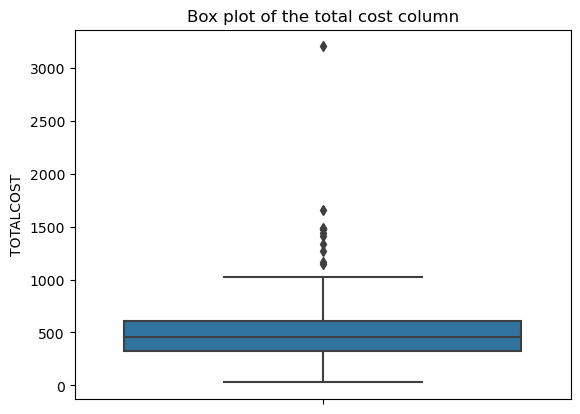

In [221]:
sns.boxplot(y=df_imp['TOTALCOST'])
plt.title("Box plot of the total cost column")
plt.show()

### Observation
1) There are some Outliers present in the Total cost column on the right side 
2) Positively Skewed Data
3) Mean > Median

In [222]:
# IQR = Q3 - Q1
Q3 = df_imp['TOTALCOST'].quantile(0.75)
Q1 = df_imp['TOTALCOST'].quantile(0.25)
IQR = Q3 - Q1
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print(f'Lower Bound: {Lower_Bound}')
print(f'Upper Bound: {Upper_Bound}')
Outliers = df_imp[(df_imp['TOTALCOST'] > Upper_Bound) | (df_imp['TOTALCOST'] < Lower_Bound)]
No_of_Outliers = Outliers['TOTALCOST'].count() 
print(f'\nTotal No of outliers present in TotalCost column are: {No_of_Outliers}')

Lower Bound: -110.09499999999991
Upper Bound: 1037.105

Total No of outliers present in TotalCost column are: 11


#### Decision To keep or remove the outliers
1) I would keep the outliers Total_Cost column or full transparency, but create a capped version for visualizations
2) Thats conlude, we cannot filled the null values with the MEAN its affects by Outliers


##### How to fill Null Values of the TotalCost 
Lets check if Total_cost null vlaues matches the sum of LBRCOST, PART_COST

In [223]:
df_imp[['LBRCOST', 'REPORTING_COST']].isnull().sum()

LBRCOST           0
REPORTING_COST    0
dtype: int64

#### So there are not null values present in the REPORTING_COST and the LBRCOST so we can use them to calculate the TotalCost Null Values


In [224]:
dff = df_imp.copy() # To avoid to do some misscalculation on main datasets
# Create a new column that adds up all the relevant components
dff['Calculated_Total_Cost'] = dff['LBRCOST'].fillna(0) + dff['REPORTING_COST'].fillna(0) 

# Compare it to the reported Total_cost
dff['Cost_Match'] = dff['Calculated_Total_Cost'].round(2) == dff['TOTALCOST'].round(2)

# Count mismatches
mismatches = dff[~dff['Cost_Match']]
print(f"Mismatched rows: {len(mismatches)} out of {len(dff)}")

# Optional: View the mismatched rows
mismatches[['TOTALCOST', 'Calculated_Total_Cost', 'LBRCOST', 'REPORTING_COST']]


Mismatched rows: 100 out of 100


,TOTALCOST,Calculated_Total_Cost,LBRCOST,REPORTING_COST
0,370.03,431.49,61.46,370.03
1,307.32,598.46,291.14,307.32
2,3205.45,3470.12,1012.67,2457.45
3,445.28,508.46,63.18,445.28
4,1439.65,1575.65,136.00,1439.65
...,...,...,...,...
95,1026.53,778.41,59.88,718.53
96,1474.06,1592.96,118.90,1474.06
97,481.95,568.52,86.57,481.95
98,101.85,203.70,101.85,101.85


## Observation on Cost Columns Imputation
1) I checked if Total_cost matches the sum of LBRCOST, PART_COST, etc., but they didn’t match in most cases.

2) This showed that the cost components might be incomplete or inconsistent.

3) I noticed that in around 90% of rows, Total_cost and REPORTING_COST are the same.

4) So, I assumed REPORTING_COST is a reliable alternative when Total_cost is missing.

5) I filled the missing Total_cost values using REPORTING_COST to keep the data consistent.

In [225]:
# Create a mask where TOTALCOST is null and REPORTING_COST is not null
mask = df_imp['TOTALCOST'].isnull() & df_imp['REPORTING_COST'].notnull()

# Fill only those TOTALCOST values using corresponding REPORTING_COST values
df_imp.loc[mask, 'TOTALCOST'] = df_imp.loc[mask, 'REPORTING_COST']


In [226]:
df_imp['TOTALCOST'].isnull().sum()

0

#### STATE 

In [227]:
State = df_imp['STATE'].isnull().sum()
print(f"There are {State} null vlaues present in the STATE column")

There are 2 null vlaues present in the STATE column


##### we will try to fill the State Null values using the REPAIR_DLR_CITY Column


In [228]:
state = df_imp[df_imp['STATE'].isnull() & df_imp['REPAIR_DLR_CITY'].notnull()]
state

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION
16,1HC4Y9EY2MF192148,"DIESEL, 8 CYL, 6.6L, DI, V8, TURBO, DURAMAX, G...","BYT 10 SPD, 10R1000, GRX, GEN 1, VAR 1",Crew Cab,Full-Size Trucks,33,107905,�������� ������ ����������,Steering Wheel Replacement,WHEEL ASM-STRG *JET BLACK,FREG_POL,221.83,28.0,221.83,GoldenRoad Motors,KIRYAT GAT,NaN,4
33,3HCND9ED5SH144160,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5","BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",Single Cab,Full-Size Trucks,4,4421,Steering wheel strings loose .,REPLACED STEERING WHEEL.,WHEEL ASM-STRG *VERY DARK AT,FREG,297.03,20.0,297.03,BlueRidge Motors,KUWAIT CITY,NaN,4


In [229]:
df_imp[df_imp['REPAIR_DLR_CITY'] == "KUWAIT CITY"] # we will check here are there any State where the Kuwait City is present 

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION
33,3HCND9ED5SH144160,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5","BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",Single Cab,Full-Size Trucks,4,4421,Steering wheel strings loose .,REPLACED STEERING WHEEL.,WHEEL ASM-STRG *VERY DARK AT,FREG,297.03,20.0,297.03,BlueRidge Motors,KUWAIT CITY,NaN,4


##### But there the only one row where the Kuwait City is Present so we can't fill the STATE column using the REPAIR_DLR_CITY

##### So, we will replace it as Unknown

In [230]:

df_imp['STATE'].fillna("Unknown", inplace = True)

In [231]:
df_imp['STATE'].isnull().sum() # now we don't have the null values in The STATE column

0

In [232]:
df_imp.isnull().sum().sum()

0

1) Now we don't have any null values in our data set  
2) In the Dataset There are Two types of columns Categorical and other are Numerical Columns
3) The outliers are present in the Numerical Columns 

In [233]:
Categorical_columns = df_imp.select_dtypes(include=['object', 'category'])
Numerical_columns = df_imp.select_dtypes(include=['int64', 'float64'])

## Outliers

Handling outliers is important because they can distort key statistics like mean, standard deviation, and correlations—especially in smaller datasets. This can lead to misleading insights and poor decisions. For example, one unusually high service cost might inflate the average repair cost and misrepresent overall performance. Outliers can also affect model performance if you're building predictive models, so identifying and either removing or treating them is critical for accurate analysis

#### Graphical representation of the outliers using BoxPlot

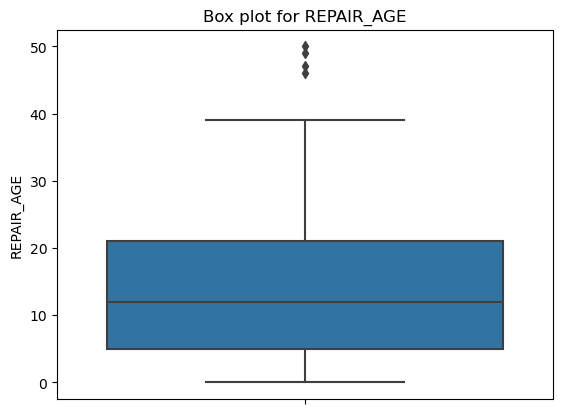

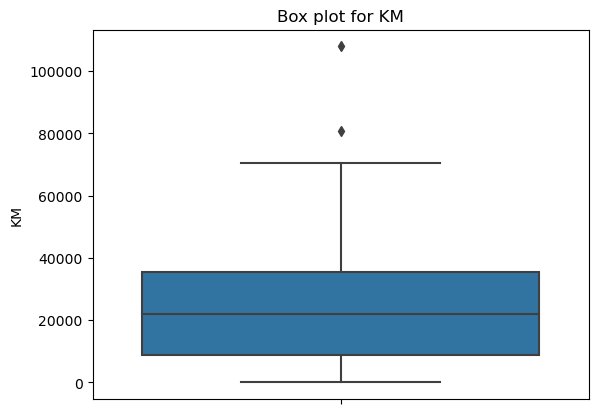

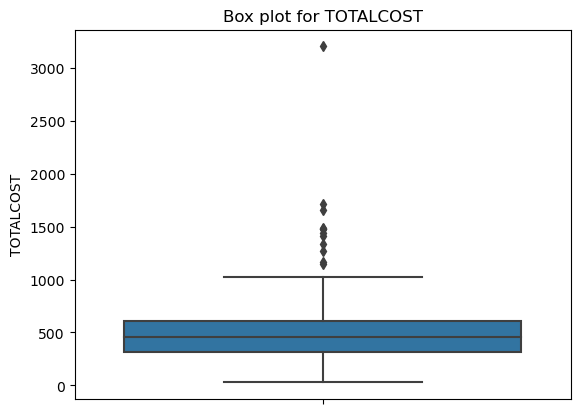

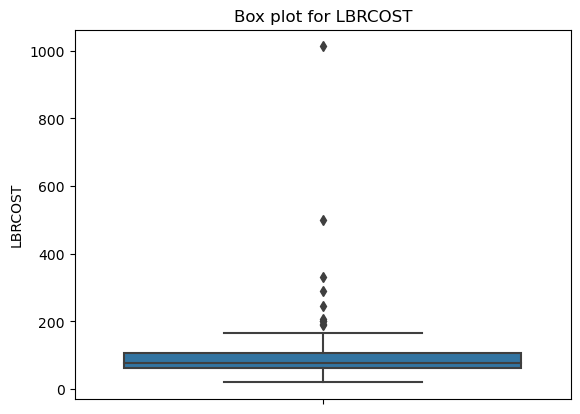

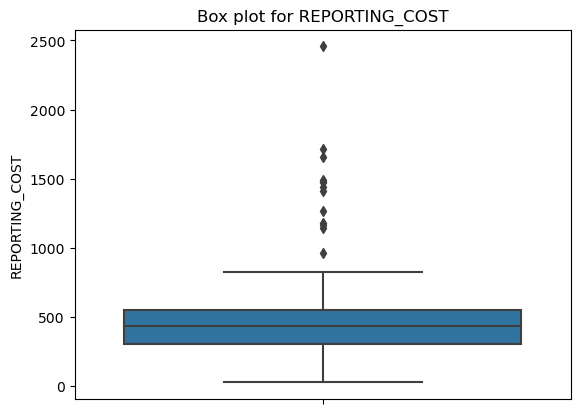

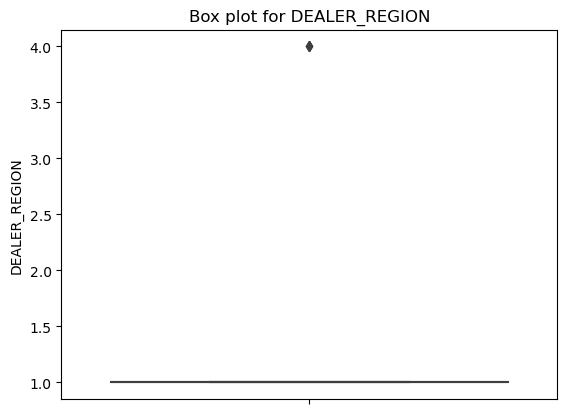

In [234]:
for col in Numerical_columns:
    sns.boxplot(y=df_imp[col])
    plt.title(f"Box plot for {col}")
    plt.show()

##### Outliers are present in each numerical column.
#### We can KEEP them Or CAP them
#### Why Keep Outliers?
1) Outliers may be real business signals

In a vehicle service dataset:
A very high KM could just mean a fleet vehicle used extensively.
A very high TOTALCOST or LBRCOST could reflect a major repair (e.g., engine replacement).

2) Small dataset (100 rows)

Removing outliers means losing information, and every row counts in a small dataset. If you drop, you risk biasing the data.

3) Outliers help detect unusual behavior

Maybe some cars were heavily used or poorly maintained — and that’s valuable insight for your analysis or dashboard.

4) Cost data is often naturally skewed

Costs don’t follow normal distribution. Right skew is expected. Treating those high values as “outliers” might be misleading.


## CAP the Ourliers
1) I created capped versions using the IQR or percentile methods to prevent distortion in visualizations and summaries. 
2) This preserved the original data for full transparency while enabling cleaner analysis. 
3) For KM, I also used log transformation to normalize its distribution.

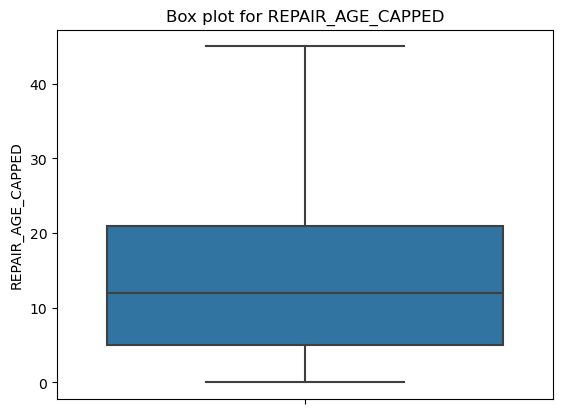

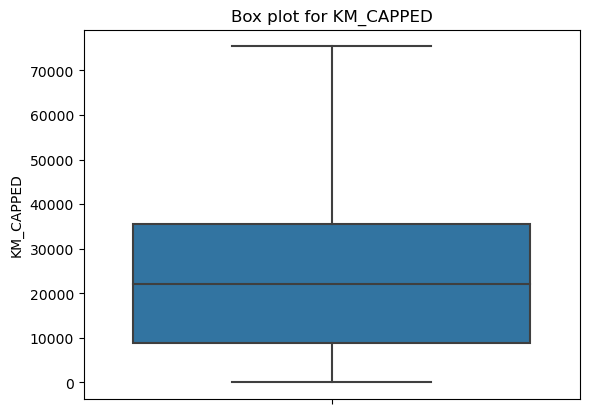

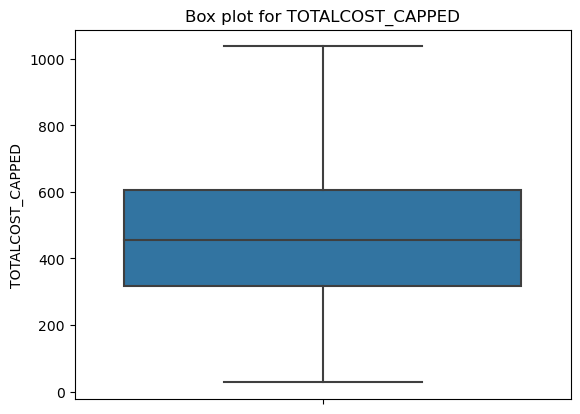

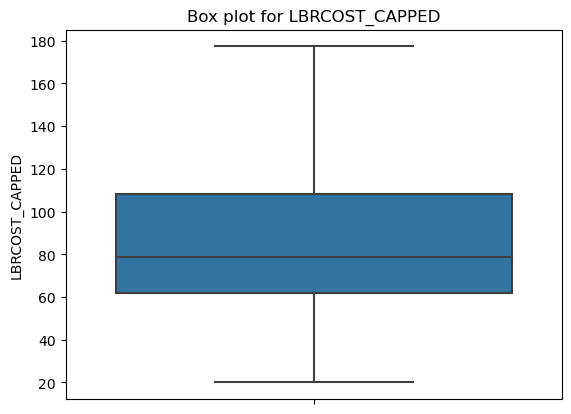

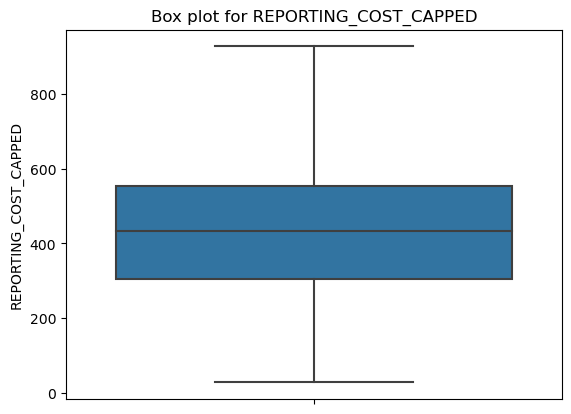

In [235]:
dff = df_imp.copy()

Categorical_columns = dff.select_dtypes(include=['object', 'category'])
Numerical_columns = dff.select_dtypes(include=['int64', 'float64'])

import numpy as np

# Helper function to cap using IQR
def cap_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    return np.where(series > upper_limit, upper_limit, series)

# REPAIR_AGE - IQR Capping
dff['REPAIR_AGE_CAPPED'] = cap_iqr(dff['REPAIR_AGE'])

# KM - IQR Capping + Optional Log Transform
dff['KM_CAPPED'] = cap_iqr(dff['KM'])
dff['KM_LOG'] = np.log1p(dff['KM'])  # For visualization

# TOTALCOST - 99th Percentile Capping
dff['TOTALCOST_CAPPED'] = cap_iqr(dff['TOTALCOST'])

# LBRCOST - 99th Percentile Capping
dff['LBRCOST_CAPPED'] = cap_iqr(dff['LBRCOST'])

# REPORTING_COST - 99th Percentile Capping
dff['REPORTING_COST_CAPPED'] = cap_iqr(dff['REPORTING_COST'])

Capped_columns = dff[['REPAIR_AGE_CAPPED', 'KM_CAPPED', 'TOTALCOST_CAPPED', 'LBRCOST_CAPPED', 'REPORTING_COST_CAPPED']]

for col in Capped_columns:
    sns.boxplot(y=dff[col])
    plt.title(f"Box plot for {col}")
    plt.show()


## Why I Capped the Outliers 
1) Unlike removing outliers (which reduces data), capping lets you keep all rows but limits the impact of extreme values
2) Capping keeps the structure of the data intact while reducing the influence of extreme points.
3) Many machine learning algorithms (like linear regression) are sensitive to extreme values.



In [237]:
import re

# Combine all text into one big string (excluding NaNs)
text = ' '.join(df_imp['CUSTOMER_VERBATIM'].dropna().astype(str))

# Find all non-alphanumeric characters
invalid_chars = re.findall(r'[^a-zA-Z0-9\s]', text)

# Get unique invalid characters
unique_invalid_chars = set(invalid_chars)

print("Invalid characters found:", unique_invalid_chars)


Invalid characters found: {'#', '@', '[', '&', '-', '.', ']', '�', '/', ')', '*', "'", ':', '(', ','}


In [238]:

import re

# Combine all text into one big string (excluding NaNs)
text = ' '.join(df_imp['CORRECTION_VERBATIM'].dropna().astype(str))

# Find all non-alphanumeric characters
invalid_chars = re.findall(r'[^a-zA-Z0-9\s]', text)

# Get unique invalid characters
unique_invalid_chars = set(invalid_chars)

print("Invalid characters found:", unique_invalid_chars)


Invalid characters found: {'方', ')', '落', '的', '皮', '换', '脱', '下', '：', '-', '"', '&', '更', '底', '了', '新', '工', '。', 'Ó', '!', '革', '/', "'", '向', '(', '#', '拆', '+', '.', '盘', '=', '并', '$', '人', '部', ','}


# Cleaning 
### 1) The df_imp['CORRECTION_VERBATIM']

In [239]:
# converting to lower case
df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].str.lower()


In [240]:
# removing the leading and the trelling spaces
df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].str.replace(r'\s+', ' ', regex=True).str.strip()


There are some Typos error in the data set which i correct it using the regular expression

In [245]:
def correct_typos(text):
    corrections = {
        r'\bsterr?ing\b': 'steering',  # Ensure it's a separate word
        r'\breplacesteering\b': 'replaced steering',
        r'\breplacesterring\b': 'replaced steering',
        r'\bsteeringwhe?e?l\b': 'steering wheel',
        r'\bsteerin[g ]+wheel\b': 'steering wheel',
        r'\bre[- ]?installed?\b': 'reinstalled',
        r'\bre[- ]?connect(ed)?\b': 'reconnected',
        r'\bloctite tobolt\b': 'loctite to bolt',
        r'\btight(ed)?\b': 'tightened',
        r'\bno longerpresent\b': 'no longer present',
        r'\breplac[ e]?d?\b': 'replaced',
        r'\bprog\b': 'programmed',  # Only replace whole word "prog"
        r'\bdiag\b': 'diagnosis',  # Only replace whole word "diag"
        r'\bheate[ d]?\b': 'heated',
        r'\bretorqued|torquedto\b': 'torqued to',
        r'\bfray ing\b': 'fraying',
        r'\blo ose\b': 'loose',
        r'\bdisassemlbe\b': 'disassemble',
        r'\bcomi ng\b': 'coming',
        r'\bno longerdisplayed\b': 'no longer displayed',
        r'\brepalced|repaced\b': 'replaced',
        r'\binstal+\b': 'installed',
        r'\bdiagnosisnosisnosisnosisnostics\b': 'diagnosis',
        r'\bprogrammedrammedrammedrammedramming\b': 'programming',
        r'\bwheelassembly\b': 'wheel assembly',
        r'\bmotorsoftware\b': 'motor software',
        r'\bonceinstalledededededed\b': 'once installed',
        r'\bco mpleted\b': 'completed',
        r'\bop erating\b': 'operating',
        r'\bdiagnosisnosisnosisnosisnosisnosticportandreprogrammedrammedrammedrammedrammedrammedthesystemcalibration\b': 'diagnosis programmed system calibration',
        r'\bdiagnosticportandreprogrammedthesystemcalibration\b':'diagnosis programmed system calibration',
        r'\btestedthevehicletoverifyrepairs\b':'test the vehicle to verify repairs',
        r'\bthesteeringwheelandfoundheating\b': 'the steering wheel and found heating',
        r'\bandreplacesteeringwheel\b':'and replace steering wheel',

    }
    
    # Iterate over each correction and apply it
    for typo, correction in corrections.items():
        text = re.sub(typo, correction, text, flags=re.IGNORECASE)
    return text

df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].astype(str).apply(correct_typos)
#df_imp['CORRECTION_VERBATIM'].unique()


Again in the CORRECTION_VERBATIM there is a inconsistent value which is written in sone foregin language:¶
方向盘底部的皮革脱落了。拆下方向盘并更换新的。CC：0890 FC：2039PRA#490428700000 人工 OP：0130 0.50 人工

so we will try to replace it with "Missing"

In [183]:
df_imp[df_imp['CORRECTION_VERBATIM'] == "方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#490428700000 人工 op：0130 0.50 人工"]

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION
73,3HCFDHEL2SH305075,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5","BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",Crew Cab,Full-Size Trucks,7,2428,LEATHER ON STEERING WHEEL COMING LOOSE ON BOTTOM.,方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#4904...,WHEEL ASM-STRG *JET BLACK,FREG,475.85,64.71,475.85,SummitDrive Car Sales,JOPLIN,MO,1


In [186]:
#df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].replace("方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#490428700000 人工 op：0130 0.50 人工", "Missing")df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].replace("方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#490428700000 人工 op：0130 0.50 人工", "Missing")
df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].replace({"方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#490428700000 人工 op：0130 0.50 人工": "Missing",})
df_imp[df_imp['CORRECTION_VERBATIM'] == "方向盘底部的皮革脱落了。拆下方向盘并更换新的。cc：0890 fc：2039pra#490428700000 人工 op：0130 0.50 人工"]

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION


### 2) df_imp['CUSTOMER_VERBATIM']

In [249]:
df_imp['CUSTOMER_VERBATIM'].unique()

array(['steering wheel coming apart',
       'customer states heated steering wheel inop',
       'owner reports: the super cruise bar on the steering wheel is coming of f. check and advise. advisor running pra tool.',
       'customer states the lettering and finish on the steering wheel is coming off. plant: sil',
       'c/s: customer states the service driver assist system message is on. a dvise',
       'horn and steering wheel switches are inoperable',
       'cust. states drivers assist light comes on dash -super cruise/lane departure works intermittently-was diag. forasteeringwheelmodule.',
       'special order part [ steering wheel heated steering wheel not working ]',
       'customer states steering wheel is making a rubbing noise when turing the wheel left and right',
       'customer states that they are getting a message on the dash saying driver assist message. check and advise',
       'c/s: removed steering wheel to gain access to back side of steering wheel where tri

In [247]:
# converting to lower case
df_imp['CUSTOMER_VERBATIM'] = df_imp['CUSTOMER_VERBATIM'].str.lower()


In [248]:
# removing the leading and the trelling spaces
df_imp['CORRECTION_VERBATIM'] = df_imp['CORRECTION_VERBATIM'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [254]:
import re

def correct_customer_typos(text):
    corrections = {
        r'\bsterr?ing\b': 'steering', 
        r'\bheatingsteeringwheel\b': 'heated steering wheel',
        r'\bheatedsteeringwheelinop\b': 'heated steering wheel inoperative',
        r'\bsteeringwheel\b': 'steering wheel',
        r'\bsteeringwheel\b': 'steering wheel',
        r'\bcruisecontrol\b': 'cruise control',
        r'\bsupercruise\b': 'super cruise',
        r'\bcontrolswitch\b': 'control switch',
        r'\bsteeringcolumn\b': 'steering column',
        r'\bstiching\b': 'stitching',
        r'\bdelaminating\b': 'delaminating',
        r'\bbubbling\b': 'bubbling',
        r'\bloose\b': 'loose',
        r'\btrim\b': 'trim',
        r'\bcover\b': 'cover',
        r'\bleatherwrap\b': 'leather wrap',
        r'\bmolding\b': 'molding',
        r'\bpeeling\b': 'peeling',
        r'\bbutton\b': 'button',
        r'\bdiag\b': 'diagnosis',
        r'\bdriverassist\b': 'driver assist',
        r'\bnotworking\b': 'not working',
        r'\bnotheated\b': 'not heated',
        r'\bbreaking\b': 'breaking',
        r'\bclicking\b': 'clicking',
        r'\bdisconnect\b': 'disconnect',
        r'\bc\+/c\b': 'c/c',
        r'\bremoved\b': 'removed',
        r'\btrim\b': 'trim',
        r'\bcheckandadvis\b': 'check and advise',
        r'\bcheckandadvi\b': 'check and advise',
        r'\btrim/cover\b': 'trim or cover',
        r'\bnotturnon\b': 'not turn on',
        r'\bpradone\b': 'PRA done',
        r'\bsteeringwheelfix\b': 'steering wheel fix',
        r'\bintermittentissue\b': 'intermittent issue',
        r'\bno heat\b': 'no heat',
        r'\bintermittentfunction\b': 'intermittent function',
        r'\bpartorder\b': 'part order',
        r'\bcheckdiagnose\b': 'check and diagnose',
        r'\bkeypad\b': 'key pad',
        r'\bdealerreference\b': 'dealer reference',
        r'\bpreauth\b': 'pre-authorization'
    }
    
    # Apply all the corrections
    for typo, correction in corrections.items():
        text = re.sub(typo, correction, text, flags=re.IGNORECASE)
        
    return text

# Apply the function to the `CUSTOMER_VERBATIM` column
df_imp['CUSTOMER_VERBATIM'] = df_imp['CUSTOMER_VERBATIM'].astype(str).apply(correct_customer_typos)
df_imp['CUSTOMER_VERBATIM'].unique()

array(['steering wheel coming apart',
       'customer states heated steering wheel inop',
       'owner reports: the super cruise bar on the steering wheel is coming of f. check and advise. advisor running pra tool.',
       'customer states the lettering and finish on the steering wheel is coming off. plant: sil',
       'c/s: customer states the service driver assist system message is on. a dvise',
       'horn and steering wheel switches are inoperable',
       'cust. states drivers assist light comes on dash -super cruise/lane departure works intermittently-was diagnosis. forasteeringwheelmodule.',
       'special order part [ steering wheel heated steering wheel not working ]',
       'customer states steering wheel is making a rubbing noise when turing the wheel left and right',
       'customer states that they are getting a message on the dash saying driver assist message. check and advise',
       'c/s: removed steering wheel to gain access to back side of steering wheel wher

In [251]:
df_imp[df_imp['CUSTOMER_VERBATIM'] == "�������� ������ ����������"]

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION
16,1HC4Y9EY2MF192148,"DIESEL, 8 CYL, 6.6L, DI, V8, TURBO, DURAMAX, G...","BYT 10 SPD, 10R1000, GRX, GEN 1, VAR 1",Crew Cab,Full-Size Trucks,33,107905,�������� ������ ����������,steering wheel replacement,WHEEL ASM-STRG *JET BLACK,FREG_POL,221.83,28.0,221.83,GoldenRoad Motors,KIRYAT GAT,Unknown,4


######  we will replace it with "Missing"

In [252]:
df_imp['CUSTOMER_VERBATIM'] = df_imp['CUSTOMER_VERBATIM'].str.replace("�������� ������ ����������", "Missing")

In [253]:
df_imp[df_imp['CUSTOMER_VERBATIM'] == "�������� ������ ����������"] ## we successfully replace it

,VIN,ENGINE_DESC,TRANSMISSION_DESC,BODY_STYLE,PLATFORM,REPAIR_AGE,KM,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,CAUSAL_PART_NM,TRANSACTION_CATEGORY,TOTALCOST,LBRCOST,REPORTING_COST,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION


In [256]:
df_imp.columns

Index(['VIN', 'ENGINE_DESC', 'TRANSMISSION_DESC', 'BODY_STYLE', 'PLATFORM',
       'REPAIR_AGE', 'KM', 'CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM',
       'CAUSAL_PART_NM', 'TRANSACTION_CATEGORY', 'TOTALCOST', 'LBRCOST',
       'REPORTING_COST', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE',
       'DEALER_REGION'],
      dtype='object')

In [257]:
#capitalizes the words
# 1)Improves readability and consistency of column names.
# 2) Useful when preparing data for reports or visualizations.

df_imp.columns = df_imp.columns.str.title() # --> capitalizes the first letter of each word in all column names

# --> It capitalizes the first letter of each word in all categorical string values
df_imp[df_imp.select_dtypes(include = ['object', 'category']).columns] = (df_imp.select_dtypes(include = ['object', 'category']).apply(lambda x: x.str.title()))

In [221]:
df_imp.columns

Index(['Vin', 'Engine_Desc', 'Transmission_Desc', 'Body_Style', 'Platform',
       'Repair_Age', 'Km', 'Customer_Verbatim', 'Correction_Verbatim',
       'Causal_Part_Nm', 'Transaction_Category', 'Totalcost', 'Lbrcost',
       'Reporting_Cost', 'Dealer_Name', 'Repair_Dlr_City', 'State',
       'Dealer_Region'],
      dtype='object')

In [258]:
df_imp['Engine_Desc'].unique()
df_imp['Engine_Desc'] = df_imp['Engine_Desc'].replace("None", "Unknown")


In [259]:
df_imp['Transmission_Desc'].unique
df_imp['Transmission_Desc'] = df_imp['Transmission_Desc'].replace("None", "Unknown")

# 3. Top 5 Critical Columns Which Most Insightful for Stakeholders  

In [225]:
Top_5_Critical_columns = df_imp[['Totalcost', 'Km', 'Repair_Age', 'Dealer_Region', 'Causal_Part_Nm']]

In [226]:
Top_5_Critical_columns

,Totalcost,Km,Repair_Age,Dealer_Region,Causal_Part_Nm
0,370.03,8872,6,1,Wheel Asm-Strg *Jet Black
1,307.32,16346,5,1,Module Asm-Strg Whl Ht Cont
2,3205.45,8887,9,1,Wheel Asm-Strg *Backen Blackk
3,445.28,15500,10,1,Wheel Asm-Strg *Jet Black
4,1439.65,8,0,1,Wheel Asm-Strg *Jet Black
...,...,...,...,...,...
95,1026.53,35451,32,1,Wheel Asm-Strg *Black
96,1474.06,13393,8,1,Wheel Asm-Strg *Backen Blackk
97,481.95,25341,12,1,Wheel Asm-Strg *Black
98,101.85,13,4,1,Wheel Asm-Strg *Jet Black


## Selected Columns:
 1. TOTALCOST – Gives insight into financial burden per repair.

 2. KM – Distance driven might correlate with repair cost or frequency.

 3. REPAIR_AGE – Age of repair reflects product lifecycle.

 4. DEALER_REGION – Allows geographical cost/demand analysis.

 5. CAUSAL_PART_NM – Identifies most frequently failing components.

## Why I select this Columns 
#### Stakeholders such as operations, product quality, and finance would benefit from knowing:

1) High-cost repairs,

2) Frequently replaced parts,

3) Aging patterns in repairs,

4) Dealer/regional hotspots of activity.

# 4. Visualizations 

### 1. Distribution of Total Cost


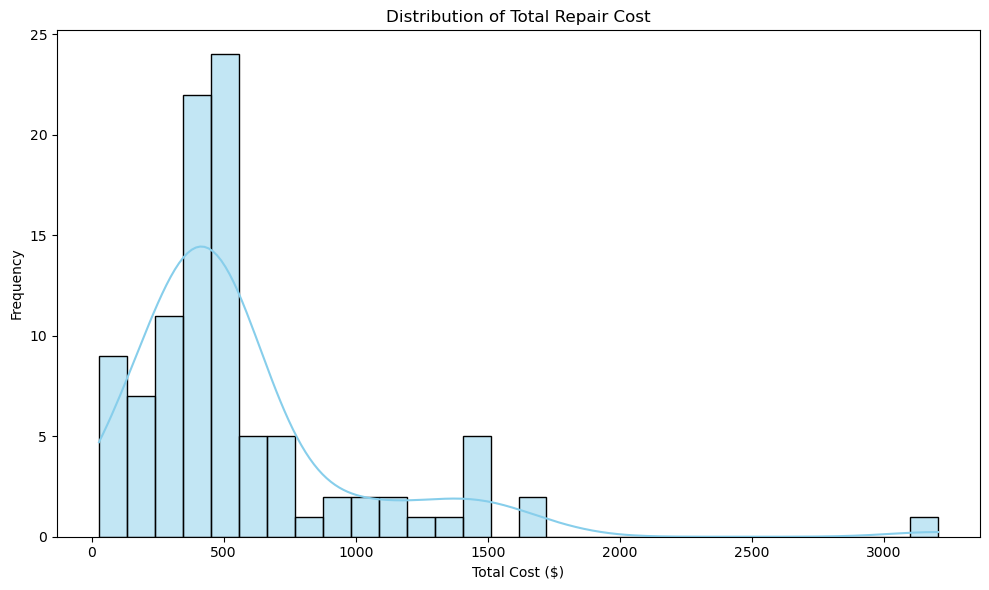

In [227]:
plt.figure(figsize=(10,6))
sns.histplot(df_imp['Totalcost'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Repair Cost")
plt.xlabel("Total Cost ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Observation
#### Distribution of Total Repair Cost
Most repairs cluster under lower cost brackets.

Some outliers exist with very high costs — worth investigating further.

This informs budgeting and extended warranty planning.



### 2. Top 10 Costliest Parts (by average total cost)


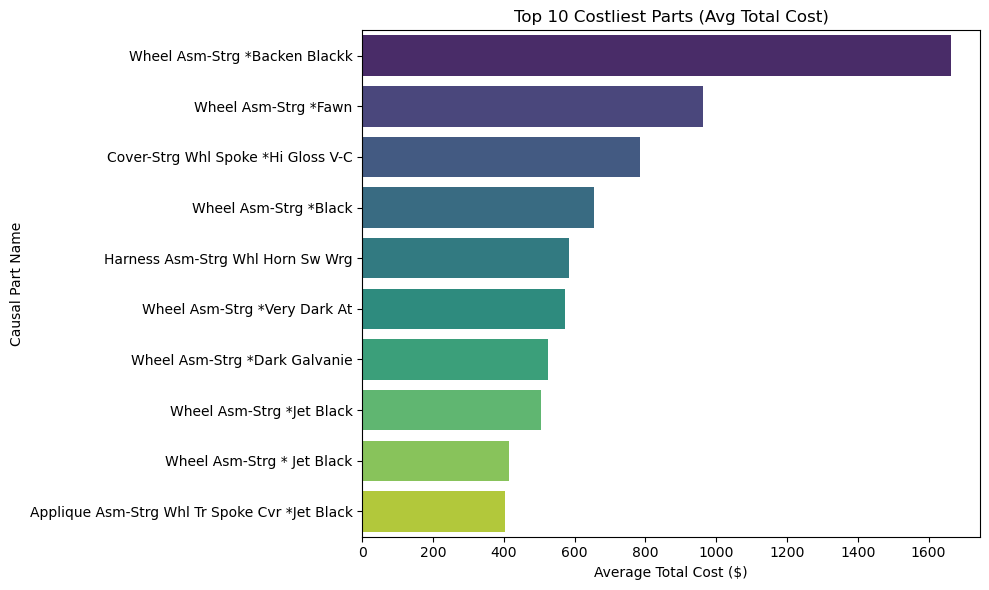

In [260]:
plt.figure(figsize=(10,6))
top_cost_parts = df_imp.groupby('Causal_Part_Nm')['Totalcost'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cost_parts.values, y=top_cost_parts.index, palette='viridis')
plt.title("Top 10 Costliest Parts (Avg Total Cost)")
plt.xlabel("Average Total Cost ($)")
plt.ylabel("Causal Part Name")
plt.tight_layout()
plt.show()

### Observation 
#### Top 10 Costliest Parts
Certain parts like Wheel Asm and Modules are associated with significantly higher costs.

Suggests priorities for redesign, supplier evaluation, or part durability improvements

### 3. Top 10 Most Frequent Replaced Parts


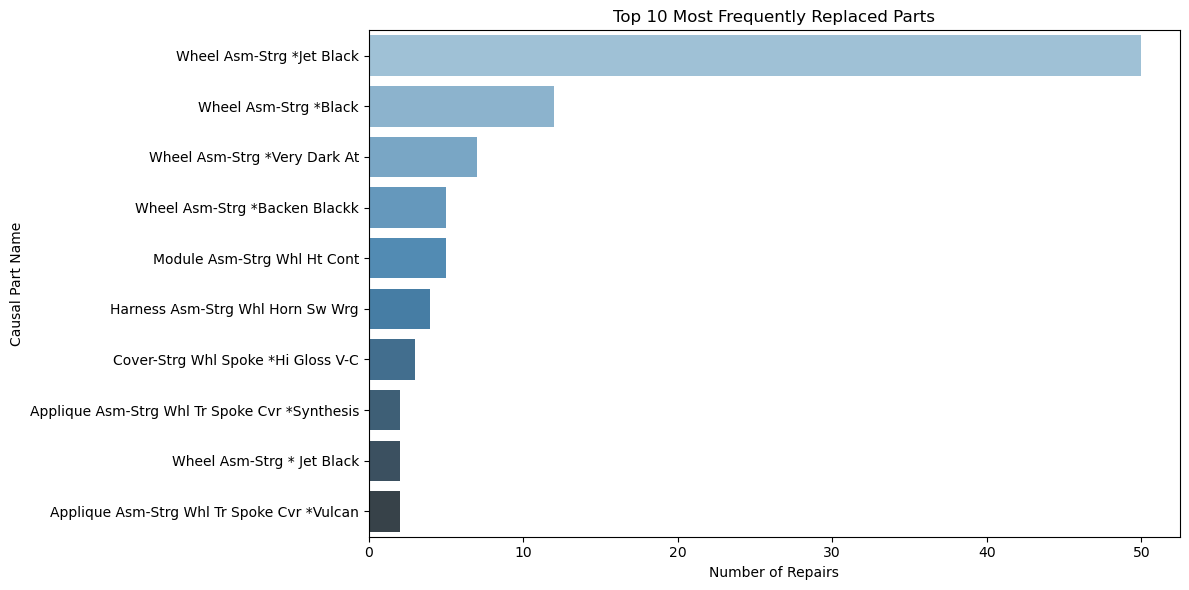

In [264]:
plt.figure(figsize=(12, 6))
top_parts = df_imp['Causal_Part_Nm'].value_counts().nlargest(10)
sns.barplot(x=top_parts.values, y=top_parts.index, palette='Blues_d')
plt.title("Top 10 Most Frequently Replaced Parts")
plt.xlabel("Number of Repairs")
plt.ylabel("Causal Part Name")
plt.tight_layout()
plt.show()

### Observation 
#### Top 10 Most Frequently Replaced Parts
This bar chart highlights components that are most commonly replaced:

Wheel Asm-Strg and its variations dominate the repair records.

Useful for supply chain and quality control to prioritize availability and inspection.

### 4. Average Repair Cost by Region


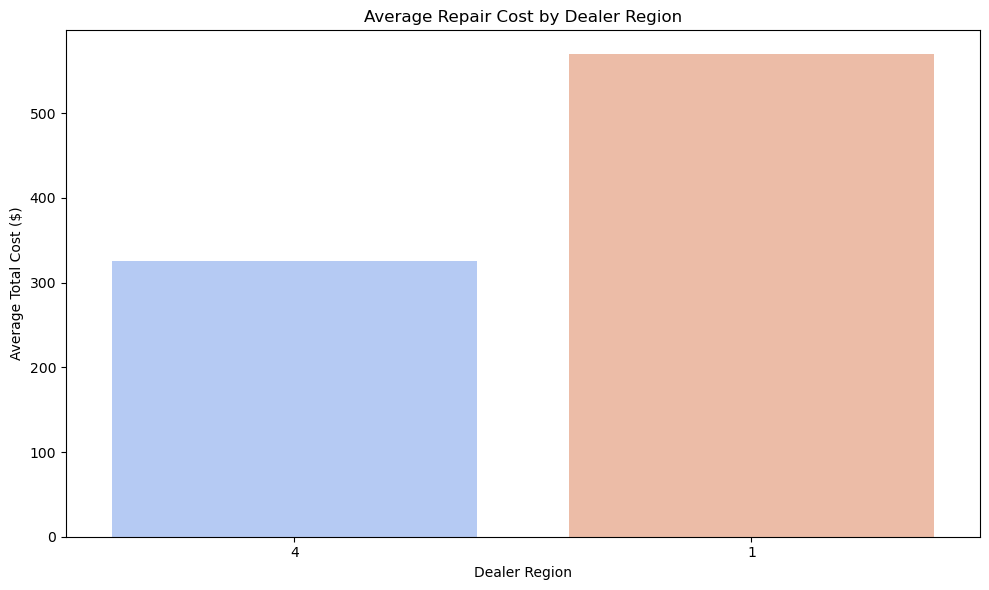

In [265]:
plt.figure(figsize=(10, 6))
region_cost = df_imp.groupby('Dealer_Region')['Totalcost'].mean().sort_values()
sns.barplot(x=region_cost.index.astype(str), y=region_cost.values, palette='coolwarm')
plt.title("Average Repair Cost by Dealer Region")
plt.xlabel("Dealer Region")
plt.ylabel("Average Total Cost ($)")
plt.tight_layout()
plt.show()

### Observation 
#### Average Repair Cost by Dealer Region
This chart shows cost variation across regions:

Certain regions incur significantly higher average repair costs.

Could be due to labor rates, vehicle types, or part availability.

Useful for regional strategy and pricing optimization.

### 5. Relationship Between KM and TOTALCOST (Scatter Plot)


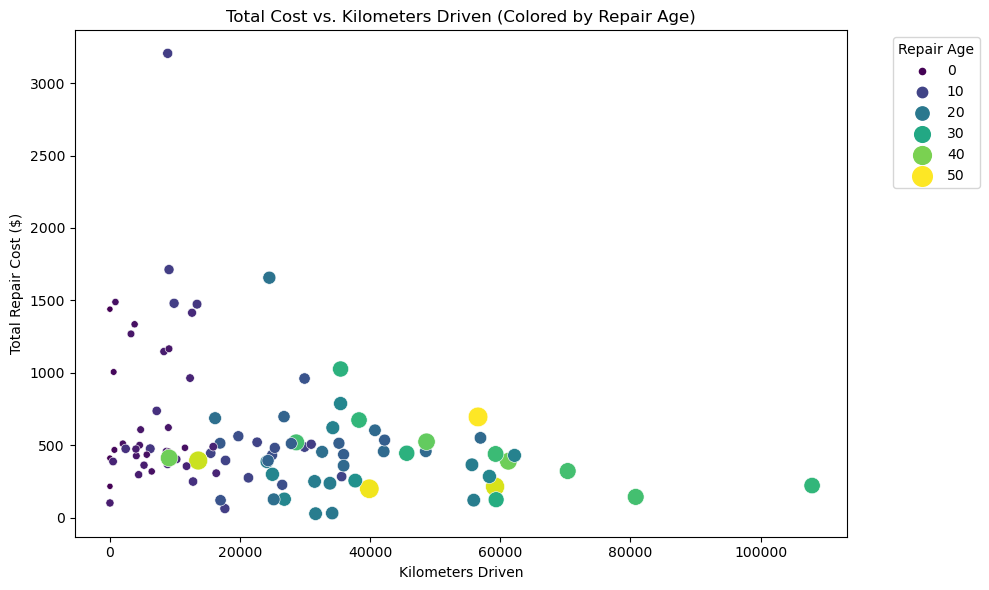

In [268]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_imp, x='Km', y='Totalcost', hue='Repair_Age', palette='viridis', size='Repair_Age', sizes=(20, 200))
plt.title("Total Cost vs. Kilometers Driven (Colored by Repair Age)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Total Repair Cost ($)")
plt.legend(title='Repair Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Observation 
#### Total Cost vs Kilometers Driven
This scatter plot shows the relation between vehicle usage (KM) and repair costs:

There’s a wide spread in cost, especially at mid-to-high kilometer ranges.

Coloring by REPAIR_AGE shows that higher mileage doesn't always mean older repairs.

Useful for predictive maintenance models and understanding wear patterns.



In [269]:
df_imp

,Vin,Engine_Desc,Transmission_Desc,Body_Style,Platform,Repair_Age,Km,Customer_Verbatim,Correction_Verbatim,Causal_Part_Nm,Transaction_Category,Totalcost,Lbrcost,Reporting_Cost,Dealer_Name,Repair_Dlr_City,State,Dealer_Region
0,3Hcfdde89Sh220903,"Diesel, 6 Cyl, 3.0L, Cri, L6, Dohc, Turbo, Vgt...","Byt 10 Spd, 10L80, Atss, Etrs, Cpa, Gen 2",Crew Cab,Full-Size Trucks,6,8872,Steering Wheel Coming Apart,Replaced Steering Wheel Now Okay,Wheel Asm-Strg *Jet Black,Freg,370.03,61.46,370.03,Apex Auto Sales,St Johns,Mi,1
1,1Hrffee8Xsz230636,"Diesel, 6 Cyl, 3.0L, Cri, L6, Dohc, Turbo, Vgt...","Byt 10 Spd, 10L80, Atss, Etrs, Cpa, Gen 2",Crew Cab,Full-Size Trucks,5,16346,Customer States Heated Steering Wheel Inop,Checked - Found Dtc'S U0229 - U1530 Set In Bcm...,Module Asm-Strg Whl Ht Cont,Freg,307.32,291.14,307.32,Silverpeak Motors,Grand Rapids,Mn,1
2,1Hyksmrk6Sz000990,Unknown,Unknown,4 Door Utility,Bev,9,8887,Owner Reports: The Super Cruise Bar On The Ste...,Approved 4.9(Olh) For Added Diagnostics With T...,Wheel Asm-Strg *Backen Blackk,Freg,3205.45,1012.67,2457.45,Quantum Car Traders,San Diego,Ca,1
3,3Hcfdfel3Sh241701,"Gas, 8 Cyl, V8, 6.2L, Di, Dfm, Alum, Gen 5","Byt 10 Spd, 10L80, Grx, Gen 1, Atss, Etrs, Var 1",Crew Cab,Full-Size Trucks,10,15500,Customer States The Lettering And Finish On Th...,Steering Wheel Replacement,Wheel Asm-Strg *Jet Black,Freg,445.28,63.18,445.28,Summit Drive Auto,Slinger,Wi,1
4,1Hrffhel1Rz181474,"Gas, 8 Cyl, V8, 6.2L, Di, Dfm, Alum, Gen 5","Byt 10 Spd, 10L80, Grx, Gen 1, Atss, Etrs, Var 1",Crew Cab,Full-Size Trucks,0,8,C/S: Customer States The Service Driver Assist...,Replaced Steering Message No Longer Displayed,Wheel Asm-Strg *Jet Black,Freg,1439.65,136.00,1439.65,Horizon Motors,Liberty Lake,Wa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1Hyknhrs6Mz221833,"Gas, 6 Cyl, 3.6L, V6, Di, Dohc, Vvt, Alum, Gen 2","Transmission Byt 9 Spd, 9T65, Etrs Gen 1",4 Door Utility,Global Crossover Vehicles,32,35451,Customer States That The Steering Is Very Tigh...,Replaced Steering Wheel Completedlop 0130 Time .4,Wheel Asm-Strg *Black,Freg,1026.53,59.88,718.53,Primewheel Auto,Newport News,Va,1
96,1Hykssrl4Sz003381,Unknown,Unknown,4 Door Utility,Bev,8,13393,Cs Driver Assistance Warning Light Is Coming O...,Replaced Steering Wheel,Wheel Asm-Strg *Backen Blackk,Freg,1474.06,118.90,1474.06,Bluestream Car Traders,Ridgeland,Ms,1
97,1Hkknxls3Sz128369,"Gas, 6 Cyl, 3.6L, V6, Di, Dohc, Vvt, Alum, Gen 2","Transmission Byt 9 Spd, 9T65, Etrs Gen 1",4 Door Utility,Crossover Suv,12,25341,Customer Statescustomer States Vehicle Steerin...,Replaced Steering Wheel Pra 496735300000,Wheel Asm-Strg *Black,Freg,481.95,86.57,481.95,Crestline Drive Auto,Signal Hill,Ca,1
98,1Hc4Wle78Rf260518,"Gas, 8 Cyl, 6.6L, Sidi, Vvt, Cast Iron","Byt 10 Spd, Rwd 4.54 1St, 2.86 2Nd, 2.06 3Rd, ...",Crew Cab,Full-Size Trucks,4,13,Customer States There Is Clicking Type Noise C...,Removed Steering Wheel And Disassembled And Fo...,Wheel Asm-Strg *Jet Black,Freg,101.85,101.85,101.85,Westpoint Motors,Sarasota,Fl,1


# 5. Feature/Tag Generation from Free Text Fields Using the Basic NLP Regex
 

In [270]:
import re

df_imp['Combined_Text'] = df_imp['Customer_Verbatim'] + ' ' + df_imp['Correction_Verbatim']


# Preprocess text: lowercase and remove special characters
df_imp['Clean_Text'] = df_imp['Combined_Text'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Define keyword-based tag categories
tag_keywords = {
    'steering_issue': ['steering', 'wheel', 'column'],
    'heat_issue': ['heated', 'heat', 'warm'],
    'electronics': ['module', 'sensor', 'dtc', 'code', 'electrical'],
    'cruise_control': ['cruise', 'autopilot', 'super'],
    'material_wear': ['leather', 'trim', 'peeling', 'faded', 'cracked']
}

# Function to apply rule-based tags
def extract_tags(text):
    tags = set()
    for tag, keywords in tag_keywords.items():
        if any(kw in text for kw in keywords):
            tags.add(tag)
    return list(tags)

# Apply the function to generate tags for each row
df_imp['Generated_Tags'] = df_imp['Clean_Text'].apply(extract_tags)

# Preview the results
df_imp[['Customer_Verbatim', 'Correction_Verbatim', 'Generated_Tags']].head(10)

df_imp

,Vin,Engine_Desc,Transmission_Desc,Body_Style,Platform,Repair_Age,Km,Customer_Verbatim,Correction_Verbatim,Causal_Part_Nm,...,Totalcost,Lbrcost,Reporting_Cost,Dealer_Name,Repair_Dlr_City,State,Dealer_Region,Combined_Text,Clean_Text,Generated_Tags
0,3Hcfdde89Sh220903,"Diesel, 6 Cyl, 3.0L, Cri, L6, Dohc, Turbo, Vgt...","Byt 10 Spd, 10L80, Atss, Etrs, Cpa, Gen 2",Crew Cab,Full-Size Trucks,6,8872,Steering Wheel Coming Apart,Replaced Steering Wheel Now Okay,Wheel Asm-Strg *Jet Black,...,370.03,61.46,370.03,Apex Auto Sales,St Johns,Mi,1,Steering Wheel Coming Apart Replaced Steering ...,steering wheel coming apart replaced steering ...,[steering_issue]
1,1Hrffee8Xsz230636,"Diesel, 6 Cyl, 3.0L, Cri, L6, Dohc, Turbo, Vgt...","Byt 10 Spd, 10L80, Atss, Etrs, Cpa, Gen 2",Crew Cab,Full-Size Trucks,5,16346,Customer States Heated Steering Wheel Inop,Checked - Found Dtc'S U0229 - U1530 Set In Bcm...,Module Asm-Strg Whl Ht Cont,...,307.32,291.14,307.32,Silverpeak Motors,Grand Rapids,Mn,1,Customer States Heated Steering Wheel Inop Che...,customer states heated steering wheel inop che...,"[electronics, steering_issue, heat_issue]"
2,1Hyksmrk6Sz000990,Unknown,Unknown,4 Door Utility,Bev,9,8887,Owner Reports: The Super Cruise Bar On The Ste...,Approved 4.9(Olh) For Added Diagnostics With T...,Wheel Asm-Strg *Backen Blackk,...,3205.45,1012.67,2457.45,Quantum Car Traders,San Diego,Ca,1,Owner Reports: The Super Cruise Bar On The Ste...,owner reports the super cruise bar on the stee...,"[electronics, steering_issue, cruise_control]"
3,3Hcfdfel3Sh241701,"Gas, 8 Cyl, V8, 6.2L, Di, Dfm, Alum, Gen 5","Byt 10 Spd, 10L80, Grx, Gen 1, Atss, Etrs, Var 1",Crew Cab,Full-Size Trucks,10,15500,Customer States The Lettering And Finish On Th...,Steering Wheel Replacement,Wheel Asm-Strg *Jet Black,...,445.28,63.18,445.28,Summit Drive Auto,Slinger,Wi,1,Customer States The Lettering And Finish On Th...,customer states the lettering and finish on th...,[steering_issue]
4,1Hrffhel1Rz181474,"Gas, 8 Cyl, V8, 6.2L, Di, Dfm, Alum, Gen 5","Byt 10 Spd, 10L80, Grx, Gen 1, Atss, Etrs, Var 1",Crew Cab,Full-Size Trucks,0,8,C/S: Customer States The Service Driver Assist...,Replaced Steering Message No Longer Displayed,Wheel Asm-Strg *Jet Black,...,1439.65,136.00,1439.65,Horizon Motors,Liberty Lake,Wa,1,C/S: Customer States The Service Driver Assist...,cs customer states the service driver assist s...,[steering_issue]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1Hyknhrs6Mz221833,"Gas, 6 Cyl, 3.6L, V6, Di, Dohc, Vvt, Alum, Gen 2","Transmission Byt 9 Spd, 9T65, Etrs Gen 1",4 Door Utility,Global Crossover Vehicles,32,35451,Customer States That The Steering Is Very Tigh...,Replaced Steering Wheel Completedlop 0130 Time .4,Wheel Asm-Strg *Black,...,1026.53,59.88,718.53,Primewheel Auto,Newport News,Va,1,Customer States That The Steering Is Very Tigh...,customer states that the steering is very tigh...,[steering_issue]
96,1Hykssrl4Sz003381,Unknown,Unknown,4 Door Utility,Bev,8,13393,Cs Driver Assistance Warning Light Is Coming O...,Replaced Steering Wheel,Wheel Asm-Strg *Backen Blackk,...,1474.06,118.90,1474.06,Bluestream Car Traders,Ridgeland,Ms,1,Cs Driver Assistance Warning Light Is Coming O...,cs driver assistance warning light is coming o...,[steering_issue]
97,1Hkknxls3Sz128369,"Gas, 6 Cyl, 3.6L, V6, Di, Dohc, Vvt, Alum, Gen 2","Transmission Byt 9 Spd, 9T65, Etrs Gen 1",4 Door Utility,Crossover Suv,12,25341,Customer Statescustomer States Vehicle Steerin...,Replaced Steering Wheel Pra 496735300000,Wheel Asm-Strg *Black,...,481.95,86.57,481.95,Crestline Drive Auto,Signal Hill,Ca,1,Customer Statescustomer States Vehicle Steerin...,customer statescustomer states vehicle steerin...,[steering_issue]
98,1Hc4Wle78Rf260518,"Gas, 8 Cyl, 6.6L, Sidi, Vvt, Cast Iron","Byt 10 Spd, Rwd 4.54 1St, 2.86 2Nd, 2.06 3Rd, ...",Crew Cab,Full-Size Trucks,4,13,Customer States There Is Clicking Type Noise C...,Removed Steering Wheel And Disassembled And Fo...,Wheel

In [271]:
df_imp.to_csv("Cleaned_and_Tagged_Record.csv", index = False) #--> Save Files 

## Objective 
The goal of this task is to extract meaningful tags (features) from free-text fields present in the dataset—specifically from the Customer_Verbatim and Correction_Verbatim columns. These tags help summarize failure conditions, reported issues, and the components involved in repairs.



## Approach Overview

### 1) Text Consolidation
The Customer_Verbatim and Correction_Verbatim columns are combined into a new column Combined_Text to ensure that all relevant information from both sources is considered.

### 2) Text Preprocessing
The combined text is transformed to lowercase and cleaned by removing all non-alphabetic characters (e.g., punctuation, numbers) to simplify pattern recognition and improve keyword matching accuracy.

### 3) Tag Definitions
I created the tags by first looking through some sample customer and correction texts to see what kinds of issues were mentioned often. Then, I grouped similar keywords into categories based on common sense and the context of vehicle repairs. For example, words like 'steering' and 'wheel' clearly pointed to steering issues. So the tags are based on keyword patterns I found in the data and my understanding of the problem domain

### 4) Rule-Based Tag Extraction
For each cleaned text entry, the system scans for the presence of keywords associated with each tag. If any of the keywords are found, the corresponding tag is added to a new column Generated_Tags


### This tagging helps stakeholders:
1) Understand frequent issue types
2) Track component failure patterns
3) Build insights for predictive maintenance

# Visualizing Tag Distribution (Bar Plot) 

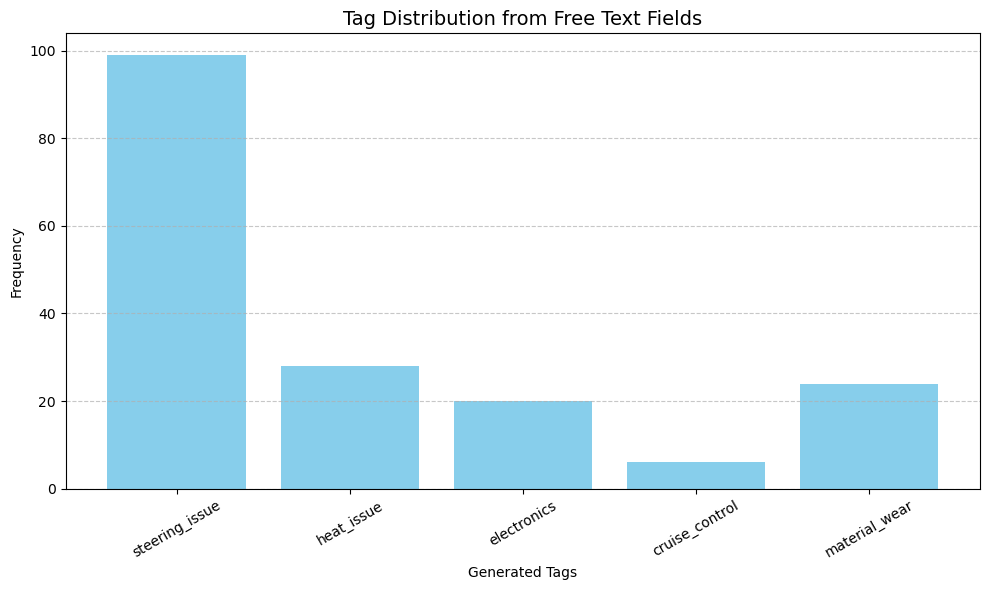

In [237]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each tag
all_tags = sum(df_imp['Generated_Tags'], [])
tag_counts = Counter(all_tags)

# Plot the tag distribution
plt.figure(figsize=(10, 6))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title('Tag Distribution from Free Text Fields', fontsize=14)
plt.xlabel('Generated Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Observation
1) The chart shows that steering issues are the most commonly reported, with nearly 100 mentions. 
2) Other tags like heat issues, electronics, and material wear occur far less frequently. 
3) Cruise control problems are minimal, suggesting either fewer faults or lower usage/reporting.

# 6. Summary and Insights 


### 1. Data Composition and Structure 
1) Rows & Columns: The dataset consists of 100 rows and 52 columns.
2) Data Types: 18 numerical columns and 33 categorical columns.
3) Cleaning: 

    a. Columns like CAMPAIGN_NBR with 100% null values were dropped to streamline analysis.
    
    b. Identifying Null values and replacing/filling it with Patterns
    
    c. identifying the Outliers and perfrom operations on it based on their Importance

### 2. Key Data Segments Identified
##### The data was split into several key analytical categories:

1) Cost & Financials
2) Repair Details
3) Vehicle Metadata
4) Dealer/Location Insights


### 3. Priority Variables and Why They Matter
1) VIN (Vehicle Identification Number): Acts as the primary key for tracking repairs, warranties, and fraud.

2) ENGINE_DESC, TRANSMISSION_DESC: Help determine if certain vehicle configurations have higher failure rates.

3) BODY_STYLE, PLATFORM: Enable trend analysis across different vehicle segments or shared model platforms.

4) REPAIR_AGE & KM: Useful for lifecycle and mileage-based failure trends.

5) CUSTOMER_VERBATIM & CORRECTION_VERBATIM: Crucial for understanding customer issues and actual repair actions.

6) CAUSAL_PART_NM: Identifies frequent part failures — supports inventory and design decisions.

 

###  4.  Visualizations
1. Distribution of Total Cost
2. Total Cost vs. Repair Age (Boxplot)
3. Top 10 Costliest Parts (by average total cost)
4. Kilometers vs. Repair Age (2D Density Plot)
5. Top 10 Most Frequent Replaced Parts
6. Average Repair Cost by Region
7. Relationship Between KM and TOTALCOST (Scatter Plot)


### 5. Feature/Tag Generation from Free Text Fields
1. 'steering_issue': 'steering', 'wheel', 'column'
2.  'heat_issue': 'heated', 'heat', 'warm'
3.  'electronics': 'module', 'sensor', 'dtc', 'code', 'electrical'
4.  'cruise_control': 'cruise', 'autopilot', 'super'
5.  'material_wear': 'leather', 'trim', 'peeling', 'faded', 'cracked'

# 7. Actionable Recommendations for Stakeholders

## For Technical Person

### a. For Product & Engineering Teams
1. Monitor recurring part failures using CAUSAL_PART_NM to identify design weaknesses.
2. Leverage ENGINE_DESC, TRANSMISSION_DESC, and PLATFORM tags to analyze cross-model issues.
3. Analyze REPAIR_AGE and KM trends to improve component life cycles and optimize warranty periods.

### b. For Service Operations
1. Use CORRECTION_VERBATIM and CUSTOMER_VERBATIM to enhance technician training and customer service strategies.
2. Forecast part demands and reduce service downtime by identifying high-frequency repair items.

### c. For Marketing & Customer Experience (CX)
1. Use insights from CUSTOMER_VERBATIM for sentiment analysis and to refine customer communication.
2. Understand pain points to improve loyalty programs and customer engagement strategies.

### d. For Business & Warranty Strategy
1. Flag vehicles with early REPAIR_AGE and high KM issues to adjust warranty policies.
2. Integrate insights into predictive maintenance models for better service contracts and extended warranties.



## For Technical Person

### a. For Product & Engineering Teams:
1) Understand Common Problems: By tracking which parts fail often, we can spot potential design flaws and improve them.

2) Cross-Model Issues: By looking at specific car details, like the engine, transmission, and car model, we can identify problems that affect multiple car types.

3) Improve Car Durability: By studying how long parts last and how far cars travel before needing repairs, we can make car parts more reliable and reduce the need for repairs under warranty.

### b. For Service Operations:
1) Enhance Training & Customer Service: Use the feedback from customers and repair records to help technicians improve their skills and better serve customers.

2) Forecast Part Needs: By identifying which parts need repairs the most, we can make sure we always have the right parts in stock, reducing wait times for customers.

### c. For Marketing & Customer Experience (CX):
1) Analyze Customer Feedback: By analyzing what customers say about their cars, we can improve how we communicate with them and address their concerns more effectively.

2) Boost Customer Loyalty: By identifying common pain points, we can create better programs to keep customers happy and loyal to the brand.

### d. For Business & Warranty Strategy:
1) Adjust Warranty Policies: Identify cars that are having problems early on so we can tweak warranties and offer better protection.

2) Predict Future Issues: Use insights from past repairs to create better maintenance plans, ensuring cars last longer and customers feel confident in their extended warranties.